# Exploratory data analysis
Introduction to exploratory data analysis (EDA).

EDA is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task [(source 1)](https://chartio.com/learn/data-analytics/what-is-exploratory-data-analysis/). It is used to explore the data, find different patterns, relations, and anomalies in the data using some statistical graphs and other visualization techniques, and possibly formulate hypotheses that could lead to new data collection and experiments [(source 2)](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/). More specifically, EDA enables analysts to:
1. get maximum insights from a data set
2. uncover underlying structure
3. extract important variables from the dataset
4. detect outliers and anomalies (if any)
5. test underlying assumptions
6. determine the optimal factor settings

## EDA steps and tools
Practical steps in conducting EDA and frequently used EDA tools.
Based on *pandas2020-main.Sales_Analysis_Pandas_P3_tutorial.ipynb* and *pandas2020-main.TED_Talks_Pandas_P3_tutorial.ipynb*.


Based on [this](https://stackoverflow.com/a/22149930/1899061), in all computations, `axis=...` refers to the axis **along which** the computation is done. By default, `axis=0`. This is consistent with the `numpy.mean` usage when axis is specified explicitly (in `numpy.mean`, `axis==None` by default, which computes the mean value over the flattened array), in which `axis=0` along the rows (namely, index in pandas), and `axis=1` along the columns.
Note also that that `axis=0` indicates aggregating along rows and `axis=1` indicates aggregating along columns. This is consistent with how we index into a dataframe. In `df.iloc[<row>, <column>]`, `<row>` is in index position 0 and `<column>` is in index position 1. For added clarity, one may choose to specify `axis='index'` (instead of `axis=0`) or `axis='columns'` (instead of `axis=1`).
**But**, `axis=0` means each row as a bulk - we manipulate a `pd.DataFrame` inter-row, instead of within-row. Likewise, 1 means each column as a bulk, i.e. we manipulate a `pd.DataFrame` inter-column instead of within-column. For example, `<pd.df>.drop("A", axis=1)` will drop a whole column.

### Reading the dataset
- `pd.read_csv()`

### Initial examination and adaptations
- `<pd.df>.shape`, `<pd.df>.head()`, `<pd.df>.tail()`, `<pd.df>.sample()`, `<pd.df>.dtypes`, `<pd.df>.info()`, `<pd.df>.describe()`
- `<pd.df>.loc[...]`, `<pd.df>.iloc[...]` - examine individual cells, columns, rows
    - `loc` works with conditions and column names, `iloc` with numerical indices
    - in both `loc` and `iloc`, multiple columns can be specified as a list of column names, and `:` in each index position means 'all'
    - in `iloc`, both index positions can be specified as lists of numeric values
- `<pd.df>.columns`, `<pd.df>.columns.values`, `<pd.df>.columns.values.tolist()` (or `<pd.df>.columns.values.to_list()`), `<pd.df>.values`
- `<pd.df>.rename({'<column_1 old name>':'<column_1 new name>', '<column_2 old name>':'<column_2 new name>', ...}, axis='columns')`, `<pd.df>.columns = ['<column_1 name>', '<column_2 name>', ...]` (change the names of all columns in <pd.df>)
- `ast.literal_eval()` (using Python's *ast* module to transform a string into a literal value, a list, a tuple or any other container object)

### Missing values and value counts
- `sb.heatmap()`, e.g. `sb.heatmap(<pd.df>.isna(),cbar=False,cmap='viridis')` ([example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/))
- `<pd.df>.isna()` (`<pd.df>.isnull()`), `<pd.df>.isna().sum()` (`<pd.df>.isnull().sum`) ([example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/))
- `<pd.df>['<column>'].value_counts()` (shows only the rows without NAs (default: dropna=True), check shape)
- `<pd.df>['<column>'].value_counts(normalize=True)` (show proportions, rather than frequencies)
- `<pd.Series>.dropna(how='all'/'any', inplace=True)` (return a new `<pd.Series>` object with missing values removed)

The `cmap` parameter of `sb.heatmap()` denotes a [Matplotlib colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html#classes-of-colormaps) (`viridis`, `cividis`, `tab20`, `winter`, `BuPu_r`, `ocean`,...).

### Examining individual data items, rows and columns
- `<pd.df>.sample()`
- Simple indexing and fancy indexing: `<pd.df>.iloc[]`, `<pd.df>.loc[]`
- `<pd.df>.index`, `<pd.df>.index[<from>:<to>]`, `<pd.df>.reset_index(drop=True, inplace=True)`
- Indexing using list of values: `<pd.df>.loc[<pd.df>.<column>.isin(<list of values>)]` (select those observations where the value of `<column>` is in the `<list of values>`)
- Indexing in data stats: `<pd.df>.describe().loc['50%', '<column_name>']` (select the median of `<column_name>` from the `<pd.df>` stats computed by `describe()`)

### Grouping and sorting data
- `<pd.df>['<column>'].unique()`, `<pd.df>['<column>'].nunique()`
- `<pd.df>['<column>'].groupby()`, `<pd.df>['<column>'].groupby().get_group()`
- `<pd.df>['<column>'].value_counts()`, `<pd.df>['<column>'].value_counts().sort_index()`, `<pd.df>['<column>'].value_counts().sort_index(inplace=True)`
- `<pd.df>.sort_values(by='<column name>', ascending=False/True)`
- `<pd.df>.groupby('<column>').<another column>.<f()>.sort_values(ascending=False)` (aggregate using function `f()`, e.g. `mean()`)
- `<pd.df>.groupby('<column>').<another column>.agg(['<f1 name>', '<f2 name>', ...])` (aggregate using multiple functions, e.g. `mean()`, `count()`,...)

If `sort_values()` is used after `agg(['f1 name>', '<f2 name>', ...])` (`agg(['<f1 name>', '<f2 name>', ...]).sort_values(by='<f name>', ascending=False)`), it must be passed one positional argument (`by='<f name>'`) before the optional `ascending=False`.


### Data transformations
- `<pd.df>.describe()`
- `pd.to_numeric(<pd.DataFrame object>['<column name>'], errors='coerce')`, `pd.DataFrame.to_numpy()`, `pd.Series.to_numpy()`, `pd.to_datetime()`, ...
- `<pd.df>.<column>.apply(<f_name>)` (apply the <f_name> function to all elements of each element of the `<column>`; for example, each element of the `<column>` can be a list of other elements)


### Exploring correlations
Explore correlations between the (numerical) columns.
- `sb.heatmap()`
- [Example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/)

### Data visualization
Plot some bargraphs, scatterplots, boxplots,...
- [Example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/)

### Other
[Other interesting ideas and different ways of using the things from above](https://realpython.com/pandas-python-explore-dataset/#exploring-your-dataset) (see the rest from [that article](https://realpython.com/pandas-python-explore-dataset/) as well).

## Import and configure packages
The `%run` magic might not work well in DataSpell, thus the following `import` statements are copied here from *import_packages.ipynb*:

In [1]:
import pandas as pd
%run "../notebooks/import_packages.ipynb"

In [ ]:
# # %load_ext autoreload
# # %autoreload 2
# 
# %matplotlib inline
# 
# # %config IPCompleter.greedy=True
# 
# import numpy as np
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# plt.style.use('classic')
# import pandas as pd
# import seaborn as sb
# 
# from plotnine import ggplot, aes, labs, geom_point, geom_line, geom_histogram, theme_xkcd, coord_cartesian, xlim, ylim, xlab, ylab, ggtitle, theme

## Introducing The British Invasion datasets

### Available datasets
The British Invasion datasets, located in the *data* folder:
* *brit.csv* - complete raw dataset (including data from Spotify, Wikipedia, AllMusic, etc.)
* *brit_col_renamed.csv* - same as *brit.csv*, but with column names modified for the sake of consistency
* *brit_performers_stripped.csv* - same as *brit_col_renamed.csv*, but with performer names stripped for `\n` etc.
* *brit_titles_stripped* - same as *brit_performers_stripped.csv*, but with song titles rstripped
* *attrs.csv* - incomplete raw dataset (some of the attributes from [a Kaggle dataset](https://www.kaggle.com/datasets/saurabhshahane/music-dataset-1950-to-2019))

### Read the *csv* file containing one of the available datasets describing The British Invasion songs
`pd.read_csv()` returns a `pd.DataFrame` object.

As for specifying the path of the dataset properly, see [this](https://stackoverflow.com/questions/35384358/how-to-open-my-files-in-data-folder-with-pandas-using-relative-path) (more specifically, **both** [this](https://stackoverflow.com/a/35384414/1899061) and [this](https://stackoverflow.com/a/43600253/1899061)).

In [2]:
# Get the songs as a pd.DataFrame object from 'data/brit.csv', 
# or from '../data/brit.csv', 
# or '../../data/brit.csv', 
# or ..., 
# depending on where the csv file is located

songs = pd.read_csv('../data/brit.csv')
songs

# If an int column contains NaN values, read_csv() sets all values to float values, because NaN are internally
# represented as float values. To read the int columns as int values and still preserve NaN values where they 
# exist, see this: https://stackoverflow.com/a/72323514. 
# The trick is: df = pd.read_csv('file.csv', dtype={'a': 'Int32', 'b': 'Int32'}), assuming that 'a' and 'b' 
# columns contain int and NaN values.

,Title,AlbumName,Record Label,Performer,Track.number,Song.duration,Composer,Year,Genre,Styles,...,speechiness,tempo,valence,duration_ms,popularity,shake.the.audience,romantic,obscene,family.spiritual,sadness
0,Glad All Over,Glad All Over,BMG,The Dave Clark Five,1,2:43,Dave Clark / Mike Smith,1964,Pop/Rock,"British Invasion, Early Pop/Rock, Rock & Roll",...,0.0585,137.789,0.896,163327.0,46.0,0.001422,0.001422,0.001422,0.001422,0.036145
1,All of the Time,Glad All Over,BMG,The Dave Clark Five,2,2:15,Dave Clark / Mike Smith,1964,Pop/Rock,"British Invasion, Early Pop/Rock, Rock & Roll",...,0.0666,131.663,0.904,135427.0,11.0,0.000731,0.000731,0.047757,0.000731,0.000731
2,Crying Over You,Glad All Over,BMG,The Dave Clark Five,3,2:09,Dave Clark / Lenny Davidson,1964,Pop/Rock,"British Invasion, Early Pop/Rock, Rock & Roll",...,0.0271,102.481,0.412,129320.0,4.0,0.001815,0.001815,0.001815,0.001815,0.317713
3,Stay,Glad All Over,BMG,The Dave Clark Five,4,2:09,Sobian Fahey / Maurice Williams,1964,Pop/Rock,"British Invasion, Early Pop/Rock, Rock & Roll",...,0.0562,135.421,0.932,129661.0,13.0,0.000605,0.059734,0.366353,0.000605,0.036609
4,Chaquita,Glad All Over,BMG,The Dave Clark Five,5,2:13,Dave Clark / Mike Smith,1964,Pop/Rock,"British Invasion, Early Pop/Rock, Rock & Roll",...,0.1460,85.429,0.449,133453.0,9.0,0.015941,0.000774,0.360738,0.000774,0.000774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,I Can't Make up My Mind,I Love You,Varèse Sarabande / Varese,The Zombies,13,2:33,Chris White,1966,Pop/Rock,"British Invasion, Baroque Pop, AM Pop, Contemp...",...,0.0361,128.499,0.685,155960.0,6.0,0.129219,0.044225,0.680243,0.001144,0.000975
1234,Remember You,I Love You,Varèse Sarabande / Varese,The Zombies,15,1:58,Chris White,1966,Pop/Rock,"British Invasion, Baroque Pop, AM Pop, Contemp...",...,0.0293,81.609,0.486,120187.0,12.0,0.079545,0.000892,0.404580,0.001698,0.066727
1235,Just Out of Reach,I Love You,Varèse Sarabande / Varese,The Zombies,16,2:08,Colin Blunstone,1966,Pop/Rock,"British Invasion, Baroque Pop, AM Pop, Contemp...",...,0.0369,136.257,0.569,129840.0,27.0,0.171965,0.000450,0.199544,0.000863,0.001316
1236,Goin' Out of My Head,I Love You,Varèse Sarabande / Varese,The Zombies,17,3:04,Teddy Randazzo / Bob Weinstein,1966,Pop/Rock,"British Invasion, Baroque Pop, AM Pop, Contemp...",...,NaN,NaN,NaN,NaN,NaN,0.001815,0.000923,0.001698,0.000684,0.004049


### Explore the dataset (first steps)

##### Initial examination and adaptations
- `<pd.df>.shape`, `<pd.df>.head()`, `<pd.df>.tail()`, `<pd.df>.sample()`, `<pd.df>.dtypes`, `<pd.df>.info()`, `<pd.df>.describe()`
- `<pd.df>.loc[...]`, `<pd.df>.iloc[...]` - examine individual cells, columns, rows
    - `loc` works with conditions and column names, `iloc` with numerical indices
    - in both `loc` and `iloc`, multiple columns can be specified as a list of column names, and `:` in each index position means 'all'
    - in `iloc`, both index positions can be specified as lists of numeric values
- `<pd.df>.columns`, `<pd.df>.columns.values`, `<pd.df>.columns.values.tolist()` (or `<pd.df>.columns.values.to_list()`), `<pd.df>.values`
- `<pd.df>.rename({'<column_1 old name>':'<column_1 new name>', '<column_2 old name>':'<column_2 new name>', ...}, axis='columns')`, `<pd.df>.columns = ['<column_1 name>', '<column_2 name>', ...]` (change the names of all columns in <pd.df>)
- `ast.literal_eval()` (using Python's *ast* module to transform a string into a literal value, a list, a tuple or any other container object)

###### A sneak peek into the dataset
- `<pd.df>.shape`, `<pd.df>.head()`, `<pd.df>.tail()`, `<pd.df>.sample()`, `<pd.df>.dtypes`, **<u>`<pd.df>.info()`**</u>, `<pd.df>.describe()` (shows descriptive statistics for numerical columns only).

When calling `display()` on a method like `<pd.df>.head()`, `<pd.df>.tail()` and `<pd.df>.sample()`, only a certain default number of columns is displayed. To display *all* columns, use `pd.set_option('display.max_columns', None)` first. To display `<n>` columns, use `pd.set_option('display.max_columns', <n>)` first. 

In [3]:
songs.shape
songs.head()
songs.tail()
songs.sample(10)
songs.dtypes
songs.info()
songs.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               1238 non-null   object 
 1   AlbumName           1238 non-null   object 
 2   Record Label        1235 non-null   object 
 3   Performer           1238 non-null   object 
 4   Track.number        1238 non-null   int64  
 5   Song.duration       1195 non-null   object 
 6   Composer            1238 non-null   object 
 7   Year                1238 non-null   int64  
 8   Genre               1238 non-null   object 
 9   Styles              1238 non-null   object 
 10  acousticness        1111 non-null   float64
 11  danceability        1111 non-null   float64
 12  energy              1111 non-null   float64
 13  instrumentalness    1111 non-null   float64
 14  liveness            1111 non-null   float64
 15  loudness            1111 non-null   float64
 16  speech

,Track.number,Year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,popularity,shake.the.audience,romantic,obscene,family.spiritual,sadness
count,1238.000000,1238.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000
mean,8.431341,1965.604200,0.369974,0.510304,0.586982,0.050533,0.203611,-9.566823,0.049114,122.861941,0.659162,161928.513951,13.333033,0.029421,0.039524,0.109826,0.022068,0.086553
std,5.554584,1.060063,0.284918,0.127316,0.197488,0.170180,0.153788,3.074124,0.039195,28.567839,0.216417,45892.679569,16.290073,0.060939,0.098411,0.182276,0.048824,0.150645
min,1.000000,1964.000000,0.000041,0.125000,0.071900,0.000000,0.025700,-21.831000,0.023600,58.267000,0.037800,24173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000313
25%,4.000000,1965.000000,0.102500,0.422500,0.446500,0.000000,0.099550,-11.371000,0.031500,102.144000,0.521500,134784.500000,2.000000,0.001032,0.000907,0.001170,0.000923,0.001012
50%,8.000000,1965.000000,0.340000,0.517000,0.586000,0.000005,0.149000,-9.178000,0.037700,121.900000,0.691000,155333.000000,7.000000,0.001815,0.001595,0.002288,0.001595,0.002288
75%,11.750000,1967.000000,0.614000,0.597000,0.736500,0.000844,0.272000,-7.515000,0.051650,136.006500,0.834000,178160.000000,18.000000,0.025278,0.030131,0.144649,0.021865,0.099774
max,35.000000,1967.000000,0.992000,0.926000,0.981000,0.979000,0.977000,-2.022000,0.625000,216.764000,0.979000,673253.000000,76.000000,0.391549,0.864662,0.848338,0.483903,0.869116


In [14]:
songs.iloc[34, 12]
songs.iloc[[245, 678, 789], [0, 1, 3]]
songs.iloc[[245, 678, 789], :]
songs.iloc[:, [0, 1, 3]]
songs.loc[songs.Performer == 'The Beatles', ['Title', 'AlbumName', 'Performer']]
songs.loc[songs['Performer'] == 'The Beatles', ['Title', 'AlbumName', 'Performer']]
songs.loc[songs['Performer'] == 'The Beatles']

,Title,AlbumName,Record Label,Performer,Track.number,Song.duration,Composer,Year,Genre,Styles,...,speechiness,tempo,valence,duration_ms,popularity,shake.the.audience,romantic,obscene,family.spiritual,sadness
138,Magical Mystery Tour,Magical Mystery Tour,Apple Records / Capitol,The Beatles,1,2:50,John Lennon / Paul McCartney,1967,Pop/Rock,"British Psychedelia, Contemporary Pop/Rock, Ps...",...,0.0931,170.962,0.3380,170107.0,54.0,0.001595,0.001595,0.001595,0.170887,0.350193
139,The Fool on the Hill,Magical Mystery Tour,Apple Records / Capitol,The Beatles,2,2:59,John Lennon / Paul McCartney,1967,Pop/Rock,"British Psychedelia, Contemporary Pop/Rock, Ps...",...,0.0272,90.844,0.3950,262267.0,5.0,0.057656,0.001754,0.001754,0.001754,0.432199
140,Flying,Magical Mystery Tour,Apple Records / Capitol,The Beatles,3,2:15,George Harrison / John Lennon / Paul McCartney...,1967,Pop/Rock,"British Psychedelia, Contemporary Pop/Rock, Ps...",...,0.0501,92.929,0.2610,135520.0,51.0,0.001012,0.001012,0.001012,0.001012,0.076558
141,Blue Jay Way,Magical Mystery Tour,Apple Records / Capitol,The Beatles,4,3:55,George Harrison,1967,Pop/Rock,"British Psychedelia, Contemporary Pop/Rock, Ps...",...,0.0308,101.052,0.0378,235067.0,50.0,0.000975,0.000975,0.000975,0.000975,0.034814
142,Your Mother Should Know,Magical Mystery Tour,Apple Records / Capitol,The Beatles,5,2:28,John Lennon / Paul McCartney,1967,Pop/Rock,"British Psychedelia, Contemporary Pop/Rock, Ps...",...,0.0332,117.613,0.7240,148413.0,56.0,0.000892,0.000892,0.000892,0.000892,0.000892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,When I'm Sixty-Four,Sgt. Pepper's Lonely Hearts Club Band,Apple Records / Capitol,The Beatles,9,2:37,John Lennon / Paul McCartney,1967,Pop/Rock,"British Psychedelia, Contemporary Pop/Rock, Ps...",...,0.0557,138.425,0.5640,160013.0,43.0,0.022937,0.001144,0.321346,0.483903,0.001144
227,Lovely Rita,Sgt. Pepper's Lonely Hearts Club Band,Apple Records / Capitol,The Beatles,10,2:42,John Lennon / Paul McCartney,1967,Pop/Rock,"British Psychedelia, Contemporary Pop/Rock, Ps...",...,0.0241,87.479,0.6590,165800.0,38.0,0.001645,0.001645,0.423235,0.001645,0.221252
228,Good Morning Good Morning,Sgt. Pepper's Lonely Hearts Club Band,Apple Records / Capitol,The Beatles,11,2:41,John Lennon / Paul McCartney,1967,Pop/Rock,"British Psychedelia, Contemporary Pop/Rock, Ps...",...,0.0897,121.624,0.8250,154467.0,35.0,0.001949,0.170851,0.001949,0.001949,0.001949
229,Sgt. Pepper's Lonely Hearts Club Band (Reprise),Sgt. Pepper's Lonely Hearts Club Band,Apple Records / Capitol,The Beatles,12,1:19,John Lennon / Paul McCartney,1967,Pop/Rock,"British Psychedelia, Contemporary Pop/Rock, Ps...",...,0.0521,118.769,0.7890,80600.0,37.0,0.030052,0.056595,0.000752,0.036551,0.000752


###### Columns
- `<pd.df>.columns`, `<pd.df>.columns.values`, `<pd.df>.columns.values.tolist()` (or `<pd.df>.columns.values.to_list()`), `<pd.df>.values`

Show the columns of the `songs` object (which is a `pd.DataFrame` object).

In [22]:
# Get the columns as a pd.Index object, using <pd.df>.columns
songs.columns
# Get the columns as a list, using list(<pd.df>.columns)
list(songs.columns)
# Get the columns as a list, using <pd.df>.columns.tolist() or <pd.df>.columns.to_list()
songs.columns.tolist()
# Get the columns as a numpy.ndarray object, using <pd.df>.columns.values or np.array(<pd.df>.columns)
songs.columns.values
# Get the values of all items in the dataset as a numpy.ndarray of sequences of the values in each item, 
# using <pd.df>.values (the type of both the encompassing and the encompassed sequences is numpy.ndarray)
songs.values
songs.values[0]
type(songs.values)
type(songs.values[0])

numpy.ndarray

###### Renaming columns
- `<pd.df>.rename(columns={'<column_1 old name>':'<column_1 new name>', '<column_2 old name>':'<column_2 new name>', ...}, inplace=True)`, or
- `<pd.df>.rename({'<column_1 old name>':'<column_1 new name>', '<column_2 old name>':'<column_2 new name>', ...}, axis='columns', inplace=True)`;
- `<pd.df>.columns = ['<column_1 name>', '<column_2 name>', ...]` (change the names of all columns in `<pd.df>`)

In [26]:
# Rename the names of some columns
songs.rename(columns={'AlbumName': 'Album', 'Record Label': 'Record_label', 'Track.number': 'Track_number', 
                      'Song.duration': 'Duration', 'shake.the.audience': 'shake_the_audience', 'family.spiritual': 'family_spiritual'}, inplace=True)
songs.columns
# Rename these columns back to their original names


Index(['Title', 'Album', 'Record_label', 'Performer', 'Track_number',
       'Duration', 'Composer', 'Year', 'Genre', 'Styles', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'duration_ms', 'popularity',
       'shake_the_audience', 'romantic', 'obscene', 'family_spiritual',
       'sadness'],
      dtype='object')

In [27]:
# Save the modified dataset
songs.to_csv('../data/brit_col_renamed.csv', index=False)

###### Adapt the data in columns to the usual formats

In [31]:
# Performer - strip everything after the performer name
for i in range(len(songs)):
    songs.iloc[i, 3] = songs.iloc[i, 3].split('\n')[0].strip()
songs.Performer

0       The Dave Clark Five
1       The Dave Clark Five
2       The Dave Clark Five
3       The Dave Clark Five
4       The Dave Clark Five
               ...         
1233            The Zombies
1234            The Zombies
1235            The Zombies
1236            The Zombies
1237            The Zombies
Name: Performer, Length: 1238, dtype: object

In [34]:
# Performer - get rid of the 'feat: ' prefix in some performer names

# songs.loc[songs.Performer.str.startswith('feat: '), 'Performer']

for i in range(len(songs)):
    if songs.Performer[i].startswith('feat: '):
        songs.iloc[i, 3] = songs.iloc[i, 3].split('feat: ')[1].strip()
songs.loc[songs.Performer.str.startswith('feat: '), 'Performer']
not any([p.startswith('feat: ') for p in songs.Performer])

True

In [35]:
# Save the modified dataset
songs.to_csv('../data/brit_performers_stripped.csv', index=False)

In [38]:
# Title - strip trailing blanks
for i in range(len(songs)):
    songs.iloc[i, 0] = songs.iloc[i, 0].rstrip()
# print(repr(songs.Title[4]))
any([t.endswith(' ') for t in songs.Title])

False

In [39]:
# Save the modified dataset
songs.to_csv('../data/brit_titles_stripped.csv', index=False)

##### Missing values and value counts
- `sb.heatmap()`, e.g. `sb.heatmap(<pd.df>.isna(),cbar=False,cmap='viridis')` ([example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/))
- `<pd.df>.isna()` (`<pd.df>.isnull()`), `<pd.df>.isna().sum()` (`<pd.df>.isnull().sum()`) ([example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/))
- `<pd.df>['<column>'].value_counts()` (shows only the rows without NAs (default: dropna=True), check shape)
- `<pd.df>['<column>'].value_counts(normalize=True)` (show proportions, rather than frequencies)
- `<pd.df>.dropna(how='all'/'any', inplace=True)`, `<pd.Series>.dropna(how='all'/'any', inplace=True)` (return a new `<pd.Series>`/`<pd.Series>` object with missing values removed)

The `cmap` parameter of `sb.heatmap()` denotes a [Matplotlib colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html#classes-of-colormaps) (`viridis`, `cividis`, `tab20`, `winter`, `BuPu_r`, `ocean`,...).

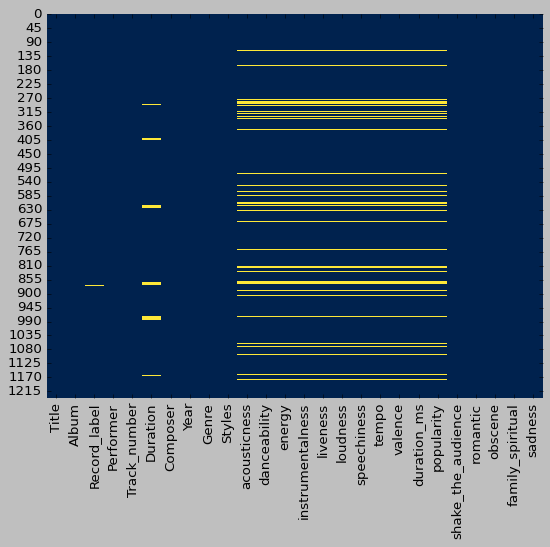

In [41]:
# Display the heatmap (missing values) of the songs dataset 
# (demonstrate using sb.heatmap() vs. sb.heatmap();)
sb.heatmap(songs.isna(), cbar=False, cmap='cividis');

How many missing values are there? (`<pd.df>.isna().sum()` for all columns, `<pd.df>.['<column>'].isna().sum()` for a specific column, `<pd.df>.isna()[['<column1>', 'column2', ...]].sum()` for selected multiple columns; `isnull()` is the same as `isna()`, and `isna()` is used more often).

Try also `<pd.df>.isna()`, `<pd.df>.isna()[['<column1>', 'column2', ...]]`, `type(<pd.df>.isna())`, `type(<pd.df>.isna().sum())`, `type(<pd.df>.isna()[['<column1>', 'column2', ...]].sum())`, `<pd.df>.isna().sum().value_counts()`.

In [58]:
songs.isna()
songs.isna().sum()
type(songs.isna().sum())
songs.acousticness.isna().sum()
songs.isna().acousticness.sum()
songs.isna()[['Performer', 'acousticness', 'Duration']]
songs.isna()[['Performer', 'acousticness', 'Duration']].sum()
type(songs.isna()[['Performer', 'acousticness', 'Duration']].sum())
songs.isna().sum().value_counts()

pandas.core.series.Series

How many missing values are there in the columns where there *are* missing values? `<i> = <pd.df>.isna().sum() > 0`, `<pd.df>.isna().sum()[<i>]`. 
Try also `<i>`, `type(<i>)`, `<i>[<i>]`, `<pd.df>.loc[:, <i>]`.

In [60]:
# songs.isna().sum() > 0
i = songs.isna().sum() > 0
# i[i]
# songs.loc[:, i]
type(songs.isna().sum())
songs.isna().sum()[i]

0      13
127    11
3       1
43      1
Name: count, dtype: int64

Show value counts for a dataframe: `<pd.df>.value_counts()`, `<pd.df>.value_counts(normalize=True)`.

In [62]:
songs.value_counts()
songs.value_counts(normalize=True)

Title                             Album                Record_label              Performer                                Track_number  Duration  Composer                                                                  Year  Genre                       Styles                                                                                                                  acousticness  danceability  energy  instrumentalness  liveness  loudness  speechiness  tempo    valence  duration_ms  popularity  shake_the_audience  romantic  obscene   family_spiritual  sadness 
'Til the Right One Comes Along    Weekend in London    BMG                       The Dave Clark Five                      6             1:55      Dave Clark / Mike Smith                                                   1965  Pop/Rock                    British Invasion, Early Pop/Rock, Rock & Roll                                                                           0.8590        0.679         0.327   0.000000          0

Leave out rows with `np.NaN` values: `<pd.df>.dropna()`, `<pd.df>.<column>.dropna()`, `<pd.df>['<column>'].dropna()`.

In [67]:
songs.dropna()
songs.dropna().isna().sum()
songs.acousticness.isna().sum()
songs.acousticness.dropna().isna().sum()

0

### Examining individual data items, rows and columns
- `<pd.df>.sample()`
- Simple indexing and fancy indexing: `<pd.df>.iloc[]`, `<pd.df>.loc[]`
- `<pd.df>.index`, `<pd.df>.index[<from>:<to>]`, `<pd.df>.reset_index(drop=True, inplace=True)`
- Indexing using list of values: `<pd.df>.loc[<pd.df>.<column>.isin(<list of values>)]` (select those observations where the value of <column> is in the `<list of values>`)
- Indexing in data stats: `<pd.df>.describe().loc['50%', '<column_name>']` (select the median of `<column_name>` from the `<pd.df>` stats computed by `describe()`)

Take a sample of the dataset to get a feeling of what's in there.

In [68]:
songs.sample(10)

,Title,Album,Record_label,Performer,Track_number,Duration,Composer,Year,Genre,Styles,...,speechiness,tempo,valence,duration_ms,popularity,shake_the_audience,romantic,obscene,family_spiritual,sadness
190,Drive My Car,Rubber Soul,Apple Records / Capitol,The Beatles,1,2:28,John Lennon / Paul McCartney,1965,Pop/Rock,"British Invasion, Contemporary Pop/Rock, Folk-...",...,0.0421,122.463,0.820,148893.0,66.0,0.002193,0.002193,0.002193,0.002193,0.224354
222,Fixing a Hole,Sgt. Pepper's Lonely Hearts Club Band,Apple Records / Capitol,The Beatles,5,2:36,John Lennon / Paul McCartney,1967,Pop/Rock,"British Psychedelia, Contemporary Pop/Rock, Ps...",...,0.0448,112.618,0.523,157960.0,38.0,0.075520,0.034465,0.000849,0.000849,0.000849
176,Help!,Help!,Apple Records / Capitol,The Beatles,1,2:19,John Lennon / Paul McCartney,1965,"Pop/Rock, Stage & Screen","British Invasion, Contemporary Pop/Rock, Rock ...",...,0.0332,95.003,0.763,139560.0,72.0,0.099988,0.000763,0.059998,0.115157,0.000763
183,Act Naturally,Help!,Apple Records / Capitol,The Beatles,8,2:30,Voni Morrison / Johnny Russell,1965,"Pop/Rock, Stage & Screen","British Invasion, Contemporary Pop/Rock, Rock ...",...,0.0308,93.020,0.944,150373.0,50.0,0.000435,0.000435,0.000435,0.000435,0.086455
335,The Ballad of Geraldine,Fairytale,Castle Music Ltd. / Fontana / Sanctuary / Sanc...,Donovan,12,4:42,Donovan / Donovan Leitch,1965,Folk,"British Folk, British Invasion, Folk Revival, ...",...,NaN,NaN,NaN,NaN,NaN,0.001754,0.001754,0.001754,0.001754,0.319568
655,Fortune Teller,The Hollies [1965],Toshiba,The Hollies,9,2:31,Naomi Neville,1965,Pop/Rock,"British Invasion, Contemporary Pop/Rock, Merse...",...,0.2000,184.661,0.352,154587.0,0.0,0.004386,0.603129,0.004386,0.004386,0.004386
470,No No (The River),Sweet Things,Polydor / Universal,Georgie Fame,15,2:03,Dave Bartholomew / Fats Domino,1966,"Pop/Rock, R&B, Jazz, Blues","British Invasion, Blue-Eyed Soul, Soul, Vocal ...",...,0.0282,89.008,0.966,123067.0,6.0,0.000863,0.000863,0.035243,0.020560,0.476033
273,Loos of England,If Music Be the Food of Love... Then Prepare f...,Repertoire,"Dave Dee, Dozy, Beaky, Mick & Tich",6,3:26,Howard Blaikley / Ken Howard,1967,Pop/Rock,British Invasion,...,0.0304,87.670,0.810,206147.0,8.0,0.022448,0.000566,0.238472,0.000566,0.308450
1127,Lover,Cellophane,Repertoire,The Troggs,17,2:26,Chris Britton,1967,Pop/Rock,"British Invasion, AM Pop, Contemporary Pop/Rock",...,0.0614,109.819,0.661,146427.0,2.0,0.380738,0.000721,0.494390,0.001012,0.034544
15,Blue Monday,American Tour,BMG,The Dave Clark Five,6,2:56,Dave Clark / Mike Smith,1964,Pop/Rock,"British Invasion, Early Pop/Rock, Rock & Roll",...,0.0924,160.349,0.642,136827.0,2.0,0.000797,0.000797,0.000797,0.074552,0.092456


What are the songs that have *some* missing values? 
Use masking to create the index of such elements; e.g. `<i>`, e.g., `<i> = songs.isna().sum() > 0` and show the type of the result (it's a `pd.Series` object).
Display `<i>.index` and `<i>.values`. 

In [74]:
i = songs.isna().sum() > 0
songs.isna().sum()[i]
i.index
i.values

array([False, False,  True, False, False,  True, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False])

From the `pd.Series` object `<i>` retrieved in the previous step, select the elements that have the values > 0 (i.e., the names of the columns that have some `NaN` values) - `<i>[<i>.values > 0]`, `<pd.df>.isna().sum()[i]`. 
Also, from the `<pd.df>` select a subset with only those columns that have *some* `NaN` values - `<pd.df>.loc[:, <i>]`.

In [92]:
songs.isna().sum()[i]
songs.loc[:, i]

Record_label          3
Duration             43
acousticness        127
danceability        127
energy              127
instrumentalness    127
liveness            127
loudness            127
speechiness         127
tempo               127
valence             127
duration_ms         127
popularity          127
dtype: int64

From a `<pd.df>` select all rows that have *some* missing values: `<pd.df>[<pd.df>.isna().any(axis=1)]`, `<pd.df>.loc[<pd.df>.isna().any(axis=1)]`, `<pd.df>.loc[<pd.df>.isna().any(axis=1), :]`.

In [90]:
songs[songs.isna().any(axis=1)]
songs.loc[songs.isna().any(axis=1)]
songs.loc[songs.isna().any(axis=1), :]

,Title,Album,Record_label,Performer,Track_number,Duration,Composer,Year,Genre,Styles,...,speechiness,tempo,valence,duration_ms,popularity,shake_the_audience,romantic,obscene,family_spiritual,sadness
88,Blue Feeling,The Animals [US],ABKCO Records,The Animals,3,2:34,Jimmy Henshaw,1964,Pop/Rock,"Blues-Rock, British Invasion, Rock & Roll, Bri...",...,NaN,NaN,NaN,NaN,NaN,0.001385,0.065920,0.001385,0.001385,0.001385
95,"Memphis, Tennessee",The Animals [US],ABKCO Records,The Animals,10,3:07,Chuck Berry,1964,Pop/Rock,"Blues-Rock, British Invasion, Rock & Roll, Bri...",...,NaN,NaN,NaN,NaN,NaN,0.003289,0.003289,0.218049,0.003289,0.314555
106,Ain't Got You,The Animals on Tour,ABKCO Records,The Animals,8,2:29,Billy Boy Arnold / Calvin Carter,1965,"Pop/Rock, Blues","British Blues, Regional Blues, Blues-Rock, Roc...",...,NaN,NaN,NaN,NaN,NaN,0.000000,0.044718,0.322253,0.064834,0.000907
112,F-E-E-L,The Animals on Tour,ABKCO Records,The Animals,14,2:44,Ray Charles,1965,"Pop/Rock, Blues","British Blues, Regional Blues, Blues-Rock, Roc...",...,NaN,NaN,NaN,NaN,NaN,0.000923,0.000923,0.000923,0.000923,0.000923
116,Cheating,Animalization,ABKCO Records,The Animals,4,2:28,Eric Burdon / Dave Rowberry,1966,"Pop/Rock, Blues","Blues-Rock, British Blues, British Invasion, R...",...,NaN,NaN,NaN,NaN,NaN,0.001949,0.001949,0.001949,0.069745,0.001949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,Take It Easy Baby,For Your Love,Griffin,The Yardbirds,10,4:12,Sonny Boy Williamson II,1965,"Pop/Rock, Blues","Blues-Rock, British Blues, British Invasion, R...",...,NaN,NaN,NaN,NaN,NaN,0.000849,0.000849,0.365509,0.001096,0.002105
1176,Out on the Water Coast,For Your Love,Griffin,The Yardbirds,11,3:12,Sonny Boy Williamson II,1965,"Pop/Rock, Blues","Blues-Rock, British Blues, British Invasion, R...",...,NaN,NaN,NaN,NaN,NaN,0.387402,0.000450,0.109503,0.002506,0.000975
1177,Let It Rock,For Your Love,Griffin,The Yardbirds,14,2:18,Chuck Berry,1965,"Pop/Rock, Blues","Blues-Rock, British Blues, British Invasion, R...",...,NaN,NaN,NaN,NaN,NaN,0.003096,0.001284,0.002770,0.002193,0.000572
1192,Lost Woman,Roger the Engineer,Edsel,The Yardbirds,1,3:14,Jeff Beck / Chris Dreja / Jim McCarty / Keith ...,1966,"Pop/Rock, Blues","Blues-Rock, British Blues, British Invasion, B...",...,NaN,NaN,NaN,NaN,NaN,0.000892,0.001462,0.565350,0.001284,0.000684


How many `NaN`s are there in each column that has `NaN`s? `<pd.df>.isna().sum()[i]`.

In [93]:
songs.isna().sum()[i]

Record_label          3
Duration             43
acousticness        127
danceability        127
energy              127
instrumentalness    127
liveness            127
loudness            127
speechiness         127
tempo               127
valence             127
duration_ms         127
popularity          127
dtype: int64

What are the rows that have missing values in a specific column of a `<pd.df>`? For example, what are the songs with missing `Duration` values?

Using `isna()`, `loc[]`, `iloc[]`, `len()` and `index`.

Calling `loc[]` effectively means *creating a subset* (typically based on a relational or logical expression over one or more columns of the dataset). In other words, `loc[]` creates a *slice* of the dataframe, so the type of the result is `<pd.df>`.

Note that `loc[]` works as `loc[<selected rows>, <selected columns>]`. The indices `<selected rows>` and `<selected columns>` can be created either directly in `loc[]` or beforehand.

If defining the <selected rows> index to be used with `loc[]` subsequently, it is a good practice to define it as a boolean *mask* over a single column, like `<pd.df>['<column>'].isna()`, or as a logical expression in which each chunk is a relational expression over a single column, e.g. `<pd.df>['<column1>'].isna() & <pd.df>['<column2>'] < 23`. The result will be a subset of the original dataframe (i.e., another `<pd.df>`).

Defining the relevant index with a statement like `<pd.df>.loc[<pd.df>['<column>'].isna()].index` is a good starting point when using `iloc[]` subsequently.

If using `iloc[]`, don't forget the `.index` chunk in the statement used to create the index (such as `<pd.df>.loc[<pd.df>['<column>'].isna()].index`). Without it, the result is another `<pd.df>`.

In [102]:
# Define i_iloc, the index to be used with iloc[], starting from <i> = <pd.df>['<column>'].isna();
# iloc[] can be used conveniently here if the relevant index is already defined with <pd.df>.loc[<i>].index, i.e. <pd.df>.loc[<pd.df>['<column>'].isna()].index;
# remember that the second index in iloc[] must be a number too (the relevant column index)
i = songs.Duration.isna()
i
i[i]
i_iloc = songs.loc[i].index
i_iloc
# # Alternatively
# i_iloc = i[i].index
# i_iloc
songs.iloc[i_iloc, [0, 1, 3, 5]]

# Define i_loc, the index (boolean mask) to be used with loc[]
i_loc = songs.Duration.isna()
songs.loc[i_loc, ['Title', 'Album', 'Performer', 'Duration']]

# display(songs.loc[i_loc.index, ['Title', 'Album']])
# display(songs.iloc[i_iloc, [0, 2]])

,Title,Album,Performer,Duration
289,I Will Follow Him,Downtown,Petula Clark,NaN
290,Darling Cheri,Downtown,Petula Clark,NaN
291,You'd Better Love Me,Downtown,Petula Clark,NaN
398,Go Away from My World,Go Away from My World,Marianne Faithfull,NaN
399,Last Thing on My Mind,Go Away from My World,Marianne Faithfull,NaN
400,Wild Mountain Thyme,Go Away from My World,Marianne Faithfull,NaN
401,Mary Ann,Go Away from My World,Marianne Faithfull,NaN
402,Scarborough Fair,Go Away from My World,Marianne Faithfull,NaN
403,North Country Maid,Go Away from My World,Marianne Faithfull,NaN
404,Sally Free and Easy,Go Away from My World,Marianne Faithfull,NaN


Replace `NaN` values in `Duration` with 'No'.

In [103]:
# Make the replacement and display it
songs.loc[i_loc, 'Duration'] = 'No'
songs.loc[i_loc, ['Title', 'Album', 'Performer', 'Duration']]

,Title,Album,Performer,Duration
289,I Will Follow Him,Downtown,Petula Clark,No
290,Darling Cheri,Downtown,Petula Clark,No
291,You'd Better Love Me,Downtown,Petula Clark,No
398,Go Away from My World,Go Away from My World,Marianne Faithfull,No
399,Last Thing on My Mind,Go Away from My World,Marianne Faithfull,No
400,Wild Mountain Thyme,Go Away from My World,Marianne Faithfull,No
401,Mary Ann,Go Away from My World,Marianne Faithfull,No
402,Scarborough Fair,Go Away from My World,Marianne Faithfull,No
403,North Country Maid,Go Away from My World,Marianne Faithfull,No
404,Sally Free and Easy,Go Away from My World,Marianne Faithfull,No


Double-check the missing values now:

In [104]:
# Use <pd.df>.Duration.isna().sum(), or <pd.df>.isna().sum()['Duration'] or sb.heatmap(<pd.df>.isna(), cmap='...')
songs.Duration.isna().sum()

0

How many songs from the beginning of The British Invasion are there?

In [106]:
# Define the beginning of The British Invasion a list comprehension
beginning = [y for y in range(1964, 1966)]
# Display the songs from the early years using a combination of <pd.df>.loc[] and isin()
songs.loc[songs.Year.isin(beginning), ['Title', 'Performer', 'Year']]

,Title,Performer,Year
0,Glad All Over,The Dave Clark Five,1964
1,All of the Time,The Dave Clark Five,1964
2,Crying Over You,The Dave Clark Five,1964
3,Stay,The Dave Clark Five,1964
4,Chaquita,The Dave Clark Five,1964
...,...,...,...
1219,Sometimes,The Zombies,1965
1220,Kind of Girl,The Zombies,1965
1221,Tell Her No,The Zombies,1965
1222,I Know She Will,The Zombies,1965


### Grouping and sorting data
- `<pd.df>['<column>'].unique()`, `<pd.df>['<column>'].nunique()`
- `<pd.df>.<column>.groupby()`, `<pd.df>.groupby('<column>')`, `<pd.df>.groupby('<column>').get_group(<value>)`
- `<pd.df>['<column>'].value_counts()`, `<pd.df>['<column>'].value_counts().sort_index()`, `<pd.df>['<column>'].value_counts().sort_index(inplace=True)`
- `<pd.df>.sort_values(by='<column name>', ascending=False/True)`
- `<pd.df>.groupby('<column>').<another column>.<f()>.sort_values(ascending=False)` (aggregate using function `f()`, e.g. `mean()`)
- `<pd.df>.groupby('<column>').<another column>.agg(['<f1 name>', '<f2 name>', ...])` (aggregate using multiple functions, e.g. `mean()`, `count()`,...)

If `sort_values()` is used after `agg([<'f1 name>', '<f2 name>', ...])` (`agg(['<f1 name>', '<f2 name>', ...]).sort_values(by='<f name>', ascending=False)`), it must be passed one positional argument (`by='<f name>'`) before the optional `ascending=False`.


How many unique values for `Year` are there in the dataset (`<pd.df>['<column>'].unique()`, `<pd.df>.<column>.unique()`; `<pd.df>['<column>'].nunique()`, `<pd.df>.<column>.nunique()`)?

In [108]:
songs.Year.unique()
songs.Year.nunique()

4

Group the songs in the dataset by the year of release (`<pd.df>.groupby('<column>')`). The result can be `songs_by_year`. Display it, show its type, and explore its individual groups and their types (`<pd.df>.groupby('<column>').get_group(<value>)`).

In [113]:
songs_by_year = songs.groupby('Year')
songs_by_year
songs_by_year.get_group(1964)

,Title,Album,Record_label,Performer,Track_number,Duration,Composer,Year,Genre,Styles,...,speechiness,tempo,valence,duration_ms,popularity,shake_the_audience,romantic,obscene,family_spiritual,sadness
0,Glad All Over,Glad All Over,BMG,The Dave Clark Five,1,2:43,Dave Clark / Mike Smith,1964,Pop/Rock,"British Invasion, Early Pop/Rock, Rock & Roll",...,0.0585,137.789,0.896,163327.0,46.0,0.001422,0.001422,0.001422,0.001422,0.036145
1,All of the Time,Glad All Over,BMG,The Dave Clark Five,2,2:15,Dave Clark / Mike Smith,1964,Pop/Rock,"British Invasion, Early Pop/Rock, Rock & Roll",...,0.0666,131.663,0.904,135427.0,11.0,0.000731,0.000731,0.047757,0.000731,0.000731
2,Crying Over You,Glad All Over,BMG,The Dave Clark Five,3,2:09,Dave Clark / Lenny Davidson,1964,Pop/Rock,"British Invasion, Early Pop/Rock, Rock & Roll",...,0.0271,102.481,0.412,129320.0,4.0,0.001815,0.001815,0.001815,0.001815,0.317713
3,Stay,Glad All Over,BMG,The Dave Clark Five,4,2:09,Sobian Fahey / Maurice Williams,1964,Pop/Rock,"British Invasion, Early Pop/Rock, Rock & Roll",...,0.0562,135.421,0.932,129661.0,13.0,0.000605,0.059734,0.366353,0.000605,0.036609
4,Chaquita,Glad All Over,BMG,The Dave Clark Five,5,2:13,Dave Clark / Mike Smith,1964,Pop/Rock,"British Invasion, Early Pop/Rock, Rock & Roll",...,0.1460,85.429,0.449,133453.0,9.0,0.015941,0.000774,0.360738,0.000774,0.000774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,Five Long Years,Five Live Yardbirds,Sunspots,The Yardbirds,6,5:18,Eddie Boyd,1964,"Pop/Rock, Blues","Blues-Rock, British Blues, British Invasion, R...",...,0.0335,94.298,0.705,304880.0,10.0,0.071365,0.002506,0.126107,0.002770,0.001754
1168,Pretty Girl,Five Live Yardbirds,Sunspots,The Yardbirds,7,3:04,Bo Diddley,1964,"Pop/Rock, Blues","Blues-Rock, British Blues, British Invasion, R...",...,0.0910,145.091,0.879,182133.0,8.0,0.045778,0.002193,0.649392,0.145354,0.001316
1169,Louise,Five Live Yardbirds,Sunspots,The Yardbirds,8,3:43,John Lee Hooker,1964,"Pop/Rock, Blues","Blues-Rock, British Blues, British Invasion, R...",...,0.0412,72.479,0.823,216640.0,11.0,0.000975,0.001595,0.045162,0.000822,0.021411
1170,I'm a Man,Five Live Yardbirds,Sunspots,The Yardbirds,9,4:33,Bo Diddley,1964,"Pop/Rock, Blues","Blues-Rock, British Blues, British Invasion, R...",...,0.1070,203.683,0.935,201307.0,0.0,0.000572,0.002632,0.005848,0.026181,0.081081


How many songs are there in the dataset for each `Year` (`<pd.df>['<column>'].value_counts()`, `<pd.df>['<column>'].value_counts()[<year>]`, `<pd.df>['<column>'].value_counts().sort_index()`)?

Note that `value_counts()` returns a `pd.Series` object, with the index equal to `<pd.df>['<column>'].unique()` values.

In [120]:
songs.Year.value_counts()
songs.Year.value_counts()[1964]
songs.Year.value_counts().sort_index()

Year
1964    203
1965    428
1966    263
1967    344
Name: count, dtype: int64

Sort the songs from the dataset by the year of release (`<pd.df>.sort_values(by='<column name>', ascending=False/True)`).
(It is also possible to use `inplace=True` in `sort_values()`, but it will change the order of songs in the dataset from that point on.)

In [122]:
songs.sort_values('Year', ascending=True)
songs.sort_values('Year')

,Title,Album,Record_label,Performer,Track_number,Duration,Composer,Year,Genre,Styles,...,speechiness,tempo,valence,duration_ms,popularity,shake_the_audience,romantic,obscene,family_spiritual,sadness
0,Glad All Over,Glad All Over,BMG,The Dave Clark Five,1,2:43,Dave Clark / Mike Smith,1964,Pop/Rock,"British Invasion, Early Pop/Rock, Rock & Roll",...,0.0585,137.789,0.896,163327.0,46.0,0.001422,0.001422,0.001422,0.001422,0.036145
972,I (Who Have Nothing),It's the Searchers,BMG / Castle Communications / Sony BMG,The Searchers,20,2:46,Carlo Donida / Jerry Leiber / Giulio Rapetti /...,1964,Pop/Rock,"British Invasion, Contemporary Pop/Rock, Merse...",...,0.0358,100.324,0.595,166827.0,6.0,0.000923,0.030131,0.160410,0.000923,0.000923
973,Don't Throw Your Love Away,It's the Searchers,BMG / Castle Communications / Sony BMG,The Searchers,35,2:17,Billy Jackson / Tony Jackson / The Searchers /...,1964,Pop/Rock,"British Invasion, Contemporary Pop/Rock, Merse...",...,0.0403,120.786,0.887,137920.0,23.0,0.001595,0.001595,0.001595,0.001595,0.001595
291,You'd Better Love Me,Downtown,Sequel,Petula Clark,15,No,Timothy Gray / Hugh Martin,1964,Pop/Rock,"AM Pop, British Invasion, Sunshine Pop",...,NaN,NaN,NaN,NaN,NaN,0.001224,0.001224,0.001224,0.001224,0.001224
290,Darling Cheri,Downtown,Sequel,Petula Clark,14,No,Mark Anthony / Petula Clark / Roger Greenaway ...,1964,Pop/Rock,"AM Pop, British Invasion, Sunshine Pop",...,0.0497,96.156,0.615,103667.0,1.0,0.000975,0.000000,0.000975,0.000975,0.073662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,Lay of the Last Tinker,A Gift from a Flower to a Garden,Collectors' Choice Music / Sony Music Distribu...,Donovan,16,1:49,Donovan,1967,"Pop/Rock, Folk","British Psychedelia, Psychedelic/Garage, Psych...",...,0.3300,90.519,0.695,109000.0,14.0,0.001096,0.081659,0.327856,0.001096,0.124921
378,The Tinker and the Crab,A Gift from a Flower to a Garden,Collectors' Choice Music / Sony Music Distribu...,Donovan,17,2:55,Donovan,1967,"Pop/Rock, Folk","British Psychedelia, Psychedelic/Garage, Psych...",...,NaN,NaN,NaN,NaN,NaN,0.002506,0.002506,0.002506,0.002506,0.173491
379,Widow With Shawl (A Portrait),A Gift from a Flower to a Garden,Collectors' Choice Music / Sony Music Distribu...,Donovan,18,3:02,Donovan,1967,"Pop/Rock, Folk","British Psychedelia, Psychedelic/Garage, Psych...",...,0.0443,154.050,0.226,181000.0,16.0,0.000892,0.000892,0.000892,0.000892,0.656597
369,Under the Greenwood Tree,A Gift from a Flower to a Garden,Collectors' Choice Music / Sony Music Distribu...,Donovan,8,1:58,Donovan,1967,"Pop/Rock, Folk","British Psychedelia, Psychedelic/Garage, Psych...",...,0.1230,114.975,0.961,116200.0,15.0,0.005263,0.005263,0.005263,0.005263,0.005263


Group the songs in the dataset by the year of release and display `mean` and/or `max` duration of the songs in each year, as well as the number (`count`) of songs in each year (`<pd.df>.groupby('<column>').<another column>.<f()>.sort_values(ascending=False)` (aggregate using function `f()`, e.g. `mean()`), `<pd.df>.groupby('<column>').<another column>.agg(['f1 name>', '<f2 name>', ...])` (aggregate using multiple functions, e.g. `mean()`, `count()`, `max()`,...)).
If `sort_values()` is used after `agg([<'f1 name>', '<f2 name>', ...])` (`agg(['<f1 name>', '<f2 name>', ...]).sort_values(by='<f name>', ascending=False)`), it must be passed one positional argument (`by='<f name>'`) before the optional `ascending=False`.

In [130]:
# To make all strings in songs.Duration look alike, insert placeholder values of the form 'mm:ss' 
# for those that are NaN, or that have been previously set to 'No', or the like
i = songs.Duration == 'No'
i[i]
songs.loc[i, 'Duration'] = '0:18'
# songs.loc[i, 'Duration']

True

In [ ]:
# Make sure that now all strings in songs.Duration are of the form 'mm:ss', i.e. they contain ':'
# using len(songs.Duration.str.contains(':'))
all(songs.Duration.str.contains(':'))

In [132]:
# Convert Duration to int

# Define to_sec() function that converts a single string of the form 'mm:ss' to int
def to_int(s):
    m, s = s.split(':')
    return int(m) * 60 + int(s)
# Use <pd.df>.<column>.apply(<function>) to convert the entire Duration column to int
songs.Duration = songs.Duration.apply(to_int)
songs.Duration

0       163
1       135
2       129
3       129
4       133
       ... 
1233    153
1234    118
1235    128
1236    184
1237    135
Name: Duration, Length: 1238, dtype: int64

In [135]:
# Make the groupings and aggregations

# <pd.df>.groupby('<column>').<another column>.<f()>.sort_values(ascending=False)
songs.groupby('Year').Duration.mean()
songs.groupby('Year').Duration.mean().sort_values(ascending=False)
# <pd.df>.groupby('<column>').<another column>.agg(['<f1 name>', '<f2 name>', ...]).sort_values(by='<f name>', ascending=False)
songs.groupby('Year').Duration.agg(['count', 'mean', 'max']).sort_values(by='count', ascending=False)

,count,mean,max
Year,,,
1965,428,149.799065,303
1967,344,170.296512,513
1966,263,165.019011,695
1964,203,151.817734,423


## Data visualization
Plot some scatterplots, line plots, bar graphs, histograms, scatterplots, box plots, violins, heatmaps,...
[Example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/)

[Matplotlib examples](https://matplotlib.org/stable/gallery/index.html)
[Seaborn examples](https://seaborn.pydata.org/examples/index.html) (see also [The Python Graph Gallery](https://www.python-graph-gallery.com/); it has a very neat user interface!)
[Plotnine examples](https://plotnine.readthedocs.io/en/stable/api.html) (click on any element for its API and examples)

<u>**Note that it is also possible to**</u> <u>**[plot lines, bargraphs,... with Pandas only](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html)**</u> (although in such cases Pandas interacts with Matplotlib under the surface).

##### Scatterplot

Read a slightly different dataset.

`pd.read_csv()` returns a `pd.DataFrame` object.

As for specifying the path of the dataset properly, see [this](https://stackoverflow.com/questions/35384358/how-to-open-my-files-in-data-folder-with-pandas-using-relative-path) (more specifically, **both** [this](https://stackoverflow.com/a/35384414/1899061) and [this](https://stackoverflow.com/a/43600253/1899061)).

In [2]:
# Get the songs as a pd.DataFrame object from 'data/stones_analysis.csv', 
# or from '../data/stones_analysis.csv.csv', or '../../data/stones_analysis.csv.csv', or ...,
# depending on where the csv file is located


Check for missing values (use, e.g., `sb.heatmap(<pd.df>.isna(), cbar=False, cmap='viridis')`).

Scatterplot the relationship between `Duration` and `danceability`.

To set the ranges of values on x-axis and y-axis (`Duration`, `danceability`), check the max values or run `describe()`.

###### 1. Matplotlib version

[Matplotlib scatterplot example](https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html)

Use the following syntax:
`ax = plt.axes()`
`ax.set(xlim=(<from>, <to>), ylim=(<from>, <to>), xlabel='<xlabel>', ylabel='<ylabel>', title='<title>')`
`ax.scatter(<pd.df>['<X>'], <pd.df>['<Y>'], marker='<marker type>', c='<fill color>', edgecolors='<edgecolor>', s=<marker size>)`; 
the `<pd.df>['<X>']` and `<pd.df>['<Y>']` arguments can be also specified as `<pd.df>.<X>` and `<pd.df>.<Y>` if `<X>` and `<Y>` are single words.
The color parameter (`c`) is optional; if present, it should be a scalar or a sequence of length consistent with the lengths of `<X>` and `<Y>` (`(<X>, <Y>)` points). The `marker` parameter is optional as well. Both `c` and `marker` have defaults. For other values of `c` and `marker`, see [this](https://matplotlib.org/stable/gallery/color/named_colors.html#css-colors) and [this](https://matplotlib.org/stable/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle.markers), respectively. A good value for `s` is 30-40 for 200-300 markers on the plot.

Alternatively:
`ax.plot(<pd.df>['<X>'], <pd.df>['<Y>'], marker='<marker type>', color='<color>', linestyle='');`
The `linestyle=''` parameter is essential for plotting the dots only - omitting it means that the connecting lines are plotted as well.

###### 2. Plotnine version
[Plotnine scatterplot example](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_point.html#plotnine.geoms.geom_point)

In *Plotnine*, the syntax for setting the ranges on x and y axes is `xlim(<from>, <to>)`, `ylim(<from>, <to>)` (as two separate lines in calling `ggplot()`), or, alternatively, `coord_cartesian(xlim=(<from>, <to>), ylim=(<from>, <to>))` as a single separate line.

If `<x>` and `<y>` values are not columns of a dataframe already (`<X>` and `<Y>`), create a minimal dataframe to support plotting (`<df> = pd.DataFrame({'<X>': <x>, '<Y>': <y>})`).

Use `ggplot` as:

`(`
&emsp;&emsp;`ggplot(<df>, aes(x='<X>', y='<Y>) +`
&emsp;&emsp;`geom_point(color='<color>', fill='<fill color>', shape='<shape>', size=<size>) +`
&emsp;&emsp;`coord_cartesian(xlim=(<from>, <to>), ylim=(<from>, <to>)) +`
&emsp;&emsp;`theme(figure_size=(10, 7), dpi=60) +`
&emsp;&emsp;`labs(x='...', y='...', title='...')`
`).draw()`

The `color`, `fill` and `shape` parameters have defaults. The other values of these parameters are the same as in Matplotlib (see [this](https://matplotlib.org/stable/gallery/color/named_colors.html) and [this](https://matplotlib.org/stable/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle), respectively).

In `theme(figure_size=(10, 7), dpi=60)`, the `dpi` parameter is necessary to achieve full control over the plot size (`figure_size` is not enough). It is a good idea to experiment with the actual values for `figure_size`and `dpi`. 

**Note 1:** `aes(x='<X>', y='<Y>)` shows compiler errors but works anyway; `aes('<X>', '<Y>)` does not show any compiler error. However, `labs(x='...', y='...', title='...')` shows compiler errors regardless of `x=...`, `y=...`, ..., but works only *with* `x=...`, `y=...`. To eliminate these compiler errors, use `xlab('...')`, `ylab('...')` and `ggtitle('...')` as separate lines after calling `ggplot()`. 

**Note 2:** Once the figure size is changed for plotnine graphs by calling `theme(figure_size=(10, 7), dpi=60)` or similar, the Matplotlib graphs use the new figure size as well and how to control it is a mystery. 

###### 3. A brief analysis of the plot: What are the shortest/longest songs and their durations?

In [ ]:
# display(<pd.df>['column'] <= <value>)                                    # Boolean mask
# display(type(<pd.df>['column'] <= <value>))                              # pd.Series
# display(<pd.df>[<pd.df>['column'] <= <value>]['column to to display'])   # select one column
# display(<pd.df>[<pd.df>['column'] <= <value>]['column 1  to to display', 'column 2 to display',...])   # select multiple columns

# Try this also with .loc[], as well as with .iloc[], with an explicitly set index and with .index


##### Line plot

How many songs from each year are there? (Use the `Year_released` column, rather than `Year_recorded`.)

In [12]:
# Use <pd.df>['<column>'].value_counts(), <pd.df>['<column>'].value_counts()[<specific value> in <column>]
# In this example, use the Year_released column, rather than Year_recorded


Sort this result by index: `pd.Series.sort_index()` (there is also `pd.DataFrame.sort_index()`).

In [ ]:
# Define val_counts_sorted_by_index


Preparation for plotting (`counts` on y-axis, `year` on x-axis): get the `np.ndarray` version of `val_counts_sorted_by_index`, as well as of its index.

One way of doing it is to use `np.array()` over `val_counts_sorted_by_index.index` and `val_counts_sorted_by_index.values`. However, the same effect is achieved using only `val_counts_sorted_by_index.index` and `val_counts_sorted_by_index.values` (their type is `np.ndarray`).

And now plot it.

###### 1. Matplotlib version
[Matplotlib line plot example](https://matplotlib.org/stable/gallery/lines_bars_and_markers/simple_plot.html)

`ax = plt.axes()`
`ax.set(xlim=(<lower limit>, <upper limit>), ylim=(<lower limit>, <upper limit>), xlabel='...', ylabel='...', title='...')`
`ax.ticklabel_format(useOffset=False)`
`ax.plot(<x>, <y>, color='...', marker='<marker type>', linewidth=<number>, alpha=<number>)`

To prevent numbers displayed in scientific notation (exponential) on axes ticks, make sure to use `ax.ticklabel_format(useOffset=False)`.

Do not use `x=<x>, y=<y>` in `ax.plot()`, it generates an error. Use just `<x>, <y>`. For the other parameters, the keywords are necessary.

Examples of parameters in `ax.plot()`: `color='steelblue'`, `linewidth=3`, `alpha=0.8` (alpha: transparency (0-1)).

###### 2. Plotnine version
[Plotnine line plot example](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_line.html#plotnine.geoms.geom_line)
[Excellent tutorial on plotnine](https://realpython.com/ggplot-python/)

For some reasons, running the Matplotlib version immediately before running the Plotnine version sometimes resets all values in `year` to 1970 (!!!), so re-creating `year` here might be necessary.

In [ ]:
# year = np.array(val_counts_sorted_by_index.index)
# display(year)


If `<x>` and `<y>` values are not in a dataframe columns (`<X>` and `<Y>`) already, create a minimal dataframe to support plotting (`<df> = pd.DataFrame({'<X>': <x>, '<Y>': <y>})`).

Use `ggplot` as:

`(`
&emsp;&emsp;`ggplot(<df>, aes(<x> = '<X>', <y> = '<Y>) +`
&emsp;&emsp;`geom_line(color='<color>', size=<size>, alpha=<transparency, 0-1>, linetype='<linetype>') +`
&emsp;&emsp;`labs(x='...', y='...')`
`).draw()`

Examples of parameters in `geom_line()`: `color='steelblue'`, `size=1`, `linetype='solid'`, `alpha=0.8` (alpha: transparency (0-1)).


###### 3. Smoothen the curves
Based on [this](https://stackoverflow.com/a/5284038/1899061).
`from scipy.interpolate import make_interp_spline, BSpline`

`<x> = <definition of x-axis variable>`
`<y> = <definition of y-axis variable>`

`<x_smooth> = np.linspace(<x>.min(), <x>max(), 300)`&emsp;&emsp;&emsp;&emsp;# 300: the number of points to make between `<x>.min() and <x>.max()`
`spl = make_interp_spline(year, counts, k=3)`&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; # type: BSpline
`<y_smooth> = spl(<x>_smooth)`

`plt.xlim([<lowest value of x to show on the plot>, <highest value of x to show on the plot>])`
`plt.ylim([<lowest value of y to show on the plot>, <highest value of x to show on the plot>])`

`plt.plot(<x_smooth>, <y_smooth>)`
`plt.plot(<x>, <y>)`&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;# optional: show the segmented line on the same plot as well
`plt.show()`



In [ ]:
# # 300 represents the number of points to make between T.min and T.max
# T = np.array([6, 7, 8, 9, 10, 11, 12])
# power = np.array([1.53E+03, 5.92E+02, 2.04E+02, 7.24E+01, 2.72E+01, 1.10E+01, 4.70E+00])
#
# # plt.plot(T,power)
# # plt.show()
#
# xnew = np.linspace(T.min(), T.max(), 300)
#
# spl = make_interp_spline(T, power, k=3)  # type: BSpline
# power_smooth = spl(xnew)
#
# plt.plot(xnew, power_smooth)
# plt.show()

# from scipy.interpolate import make_interp_spline, BSpline
# 
# year_smooth = np.linspace(years.min(), years.max(), 300)
# spl = make_interp_spline(years, counts, k=3)  # type: BSpline
# counts_smooth = spl(year_smooth)
# 
# plt.ticklabel_format(useOffset=False)
# 
# plt.xlim([1961, 2020])
# plt.ylim([0, 40])
# 
# plt.xlabel('year')
# plt.ylabel('count')
# plt.title('Song counts over years')
# 
# plt.plot(year_smooth, counts_smooth)
# plt.plot(years, counts)
# plt.show()
#
# # Alternatively
# ax = plt.axes()
# ax.set(xlim=(years.min(), years.max()), ylim=(0, 70), xlabel='year', ylabel='count', title='Song counts over years')
# ax.plot(years, counts, color='steelblue', linewidth=2, marker='o', alpha=0.8)
# ax.plot(year_smooth, counts_smooth, color='steelblue', linewidth=3, alpha=0.8);

###### 4. Multiple subplots
(shown here after [this](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html))

In [ ]:
# # From https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html
# fig = plt.figure()
# ax1 = fig.add_axes([0.1, 0.55, 0.8, 0.4],
#                    xticklabels=[], ylim=(-1.2, 1.2))
# ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
#                    ylim=(-1.2, 1.2))
# # Meanings of the numbers in [0.1, 0.55, 0.8, 0.4]:
# #     0.1 - distance from the left edge of fig (grey area)
# #     0.55 - distance between the upper and lower subplots (0.5: they touch each other)
# #     0.8 - distance from the right edge of fig (grey area)
# #     0.4 - area assigned to the upper/lower subplot (ax1/ax2) along the vertical axes
# # Experiment with these numbers to get a better feeling for them

# x = np.linspace(0, 10)
# ax1.plot(np.sin(x))
# ax2.plot(np.cos(x));

# fig, ax = plt.subplots()
# ax


# fig = plt.figure()
# # fig
# ax1 = fig.add_axes([0.1, 0.559, 0.8, 0.4],
#                    xlim=(1962, 2020), ylim=(0, 35),
#                    xlabel='year', ylabel='counts',
#                    title='Number of songs recorded over the years')
# ax2 = fig.add_axes([0.1, 0.105, 0.8, 0.35],
#                    xlim=(1962, 2020), ylim=(0, 35),
#                    xlabel='year', ylabel='counts',
#                    title='Number of songs recorded over the years')
# # display(type(ax1))
# ax1.ticklabel_format(useOffset=False)
# ax2.ticklabel_format(useOffset=False)
# 
# ax1.plot(years, counts, color='steelblue', linewidth=1.5, alpha=0.8)    # alpha: transparency (0-1)
# ax2.plot(years, counts, color='purple', linewidth=1.5, alpha=0.8);      # alpha: transparency (0-1)

##### Histogram

Use Pandas to extract song lengths as a `pd.Series` object (`<pd.Series object> = <pd.df>['<column>']`).

In [1]:
# Get the song lengths as a pd.Series object


In [2]:
# Convert the song lengths into a NumPy array (using <song lengths>.to_numpy() or np.array(<song lengths>))


###### 1. Matplotlib version
[Matplotlib histogram example](https://matplotlib.org/stable/gallery/statistics/hist.html)

Plot the histogram of the song lengths using Matplotlib.

Minimal version: `plt.hist(<x>, bins=<number of bins>);` or `sb.histplot(<x>, bins=<number of bins>)`.

Alternatively:
`ax = plt.axes()`
`ax.set(xlabel='...', ylabel='...', title='...')`
`ax.hist(<x>, bins=<number of bins>)`

As for the plot styles, there are a lot of [available styles](https://www.dunderdata.com/blog/view-all-available-matplotlib-styles) that can be also shown in code using `plt.style.available`. See also [this](https://www.analyticsvidhya.com/blog/2021/08/exploring-matplotlib-stylesheets-for-data-visualization/).

Alternatively, plot style can be set using `sb.set_theme(palette='...')` (or just `sb.set()`, but that function might get deprecated and removed from *Seaborn* in the future). See [`sb.set_theme()` documentation](https://seaborn.pydata.org/generated/seaborn.set_theme.html) for the function's parameters and defaults. For `palette='...'` use any of the palettes shown with `plt.style.available`, or any of [these](https://matplotlib.org/stable/users/explain/colors/colormaps.html#qualitative), or...

In [3]:
# Set plot style using sb.set_theme(palette='Pastel2')

# Plot the histogram - x: song time in [sec]; y: number of songs; 40 bins

# Minimal version

# A more detailed version


###### 2. Plotnine version
[Plotnine histogram example](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_histogram.html#plotnine.geoms.geom_histogram)

Plot the histogram of the song lengths using *Plotnine*.

A minimal, but effective version:
`plot = ggplot(songs, aes(x='<x>'))`
`plot + geom_histogram(bins=40)`

A more detailed version:
`(`
&emsp;&emsp;`ggplot(songs, aes(x='<x>')) +`
&emsp;&emsp;`geom_histogram(bins=40, color='<color>', fill='<fill>', size='<outline thickness>', alpha=<transparency, 0-1>) +`
&emsp;&emsp;`labs(x='<x>', y='count', title='<title>')`
`).draw()`

[Excellent tutorial on plotnine](https://realpython.com/ggplot-python/).

In [57]:
# Minimal version
# plot = ggplot(songs, aes(x='Duration'))
# plot + geom_histogram(bins=40)


To avoid the annoying text output like `<ggplot: (177159008578)>` under the plot, use the following syntax:

`(`
&emsp;&emsp;`ggplot(songs, aes(x='<x>')) +`
&emsp;&emsp;`geom_histogram(bins=40, color='<color>', fill='<fill>', size='<outline thickness>', alpha=<transparency, 0-1>) +`
&emsp;&emsp;`labs(x='<x>', y='count', title='<title>')`
`).draw()`

##### Bar graph

How many Rolling Stones songs have reached Billboard Top 50?

Read the dataset (`'../data/stones_analysis.csv'`) and make some minor transformations.

`pd.read_csv()` returns a `pd.DataFrame` object.

As for specifying the path of the dataset properly, see [this](https://stackoverflow.com/questions/35384358/how-to-open-my-files-in-data-folder-with-pandas-using-relative-path) (more specifically, **both** [this](https://stackoverflow.com/a/35384414/1899061) and [this](https://stackoverflow.com/a/43600253/1899061)).

In [4]:
# Get the songs as a pd.DataFrame object from 'data/The Rolling Stones songs dataset, v1.csv', or from
# '../data/stones_analysis.csv', or '../../data/stones_analysis.csv', or ..., 
# depending on where the csv file is located


Add another column, `Top100`: a song has reached the US Top 100 chart (`Yes`), or it hasn't (`No`).

Create the index of the songs that HAVE reached the US Top 100 chart : `i = songs.loc[songs['US'] != 'No'].index` or `i = np.array(songs.loc[songs['US'] != 'No'].index)`.

Change the values of `Top100` corresponding to the created index to `Yes`. **Make sure to work on a <u>copy</u> of the `Top100` columns (e.g., `top100 = songs.Top100.copy()`), to avoid the caveat of working on the dataframe directly.**

Check if the newly added `Top100` column is now OK. Try this using the index created in the previous step, as well as using `i = songs.loc[songs['US'] != 'No'].index` directly.

<u>Save this version as a new *.csv* file, for use in the subsequent examples.</u> (`<pd.df>.to_csv('<path>')`)

###### Preparing the data for plotting the bar graph

Group the data - group the songs by the year of release.

Use `get_group(<year>)` to get all songs for a selected year and `value_counts()` over the resulting group's `Top100` column (showing the `Yes` and `No` subgroups). This is a precursor to creating the data for the y-axis of the bar graph.

Build the data to plot by extracting relevant items from each group.

For x-axis, use `unique()` over the `Year_released` column and then `np.sort()` the results.

For y-axis, create the lists of the numbers of the songs that have reached the US Top 100 (`in_top100`) and of those that haven't (`not_in_top100`).
(Start from two empty lists. Loop over the sorted list of years created in the previous step, `get_group()` for each year and append the `value_counts()['Yes']` of the `Top100` column of the current year (`y['Top100']`) to `in_top50` if any of `y['Top100']` has the value `Yes`, otherwise append 0. Do the similar thing for `not_in_top100`. Display both lists in the end to double-check the result.)

And now plot the bar graph. Based on the second example from [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) (using `<pd.df>.plot.bar()`, not Matplotlib or Seaborn).
For a complete list of parameters used in `**kwargs`, see [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).
For a list of named colors (Matplotlib named colors), see [here](https://matplotlib.org/stable/gallery/color/named_colors.html#css-colors).

First create an auxiliary dataframe to use for plotting. Use `in_top50` and `not_in_top50` as the columns, <u>and the sorted list of years created above as the index of the dataframe</u>.

In [5]:
# # The role-model example from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
# speed = [0.1, 17.5, 40, 48, 52, 69, 88]
# lifespan = [2, 8, 70, 1.5, 25, 12, 28]
# index = ['snail', 'pig', 'elephant', 'rabbit', 'giraffe', 'coyote', 'horse']
# df = pd.DataFrame({'speed': speed, 'lifespan': lifespan}, index=index)


[Pandas bargraph example](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)

Use `ax = <pd.df>.plot.bar()` to plot the bargraph.

Relevant parameters:
- `rot=<rotation angle [degrees]>` for the x-axis labels
- `ylim=(<from>, <to>)`
- `color={'In Top 50': 'limegreen', 'Not in Top 50': 'navajowhite'}` (for a list of Matplotlib named colors, see [here](https://matplotlib.org/stable/gallery/color/named_colors.html#css-colors))
- `edgecolor='<color of bin lines>'`
- `title='<title>'`
- `xlabel='<xlabel>'`
- `ylabel='<ylabel>'`
- `fontsize=<fontsize>` (for all text; suitable fontsizes are 10, 12,...)
- `stacked=True` (the bins for the same x-axis value stacked on top of one another)

The returned value (`ax`) is usually unnecessary and can be omitted.

##### Box plot
[Seaborn boxplot example](https://seaborn.pydata.org/generated/seaborn.boxplot.html) (used here as the role model)

For Seaborn color palette names see [this](https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette) or [this](https://10xsoft.org/courses/data-analysis/mastering-data-visualization-with-python/section-4-data-visualization-using-seaborn/colour-palettes-seaborn/). To list the names of some ('quantitative') Seaborn color palettes, use `sb.palettes.SEABORN_PALETTES.keys()` (see [this](https://10xsoft.org/courses/data-analysis/mastering-data-visualization-with-python/section-4-data-visualization-using-seaborn/colour-palettes-seaborn/) and [this](https://www.codecademy.com/article/seaborn-design-ii) for additional named palettes).

Read the dataset (`'data/stones_analysis_top100.csv'`).

`pd.read_csv()` returns a `pd.DataFrame` object.

As for specifying the path of the dataset properly, see [this](https://stackoverflow.com/questions/35384358/how-to-open-my-files-in-data-folder-with-pandas-using-relative-path) (more specifically, **both** [this](https://stackoverflow.com/a/35384414/1899061) and [this](https://stackoverflow.com/a/43600253/1899061)).

In [6]:
# Get the songs as a pd.DataFrame object from 'data/stones_analysis_top100.csv', or from
# '../data/stones_analysis_top100.csv', or '../../data/stones_analysis_top100.csv.csv', or ..., depending on where the csv file is located


Use `sb.boxplot()` to plot some boxplots.

For a single-column boxplot, relevant parameters are `y=<pd.df>['column']` (for 'vertical' boxplot) or `x=<pd.df>['column']` (for 'horizontal' boxplot), and `palette='palette'` (e.g., 'Set3', 'pastel', ...; see the links above for other named color palettes).

For a multiple-column boxplot, relevant parameters are `data=<pd.df>[['column1', 'column2',...]]`, `orient='v'` (for 'vertical' boxplot) and `palette='palette'`.

In [7]:
# display(sb.palettes.SEABORN_PALETTES.keys())

# For a single column (e.g., Duration)
# # sb.boxplot(x=songs.Duration, palette='Set1');
# sb.boxplot(y=songs.Duration, palette='Set1');

# For multiple columns (e.g., energy and acousticness)


##### Violin plot
[Seaborn violin plot example](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

Combines box plot and density plot. Based on [this](https://stackoverflow.com/questions/46134113/seaborn-violin-plot-from-pandas-dataframe-each-column-its-own-separate-violin-p) and [this](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

Read the dataset (`'data/stones_analysis_top100.csv'`).

`pd.read_csv()` returns a `pd.DataFrame` object.

As for specifying the path of the dataset properly, see [this](https://stackoverflow.com/questions/35384358/how-to-open-my-files-in-data-folder-with-pandas-using-relative-path) (more specifically, **both** [this](https://stackoverflow.com/a/35384414/1899061) and [this](https://stackoverflow.com/a/43600253/1899061)).

In [8]:
# Get the songs as a pd.DataFrame object from 'data/stones_analysis_top100.csv', or from
# '../data/stones_analysis_top100.csv', or '../../data/stones_analysis_top100.csv.csv', or ..., depending on where the csv file is located


Use `sb.violinplot()` like: `sb.violinplot(x=<pd.df>.loc[<selected indices for <column 1>, '<column 1>'], y=<pd.df>['<column 2>'], palette='<palette>')`.

For example, if the violin plot should represent density/boxplot diagram of song `Duration` in certain `Year`s (`Year_released`s), then `<column 1>` is `Year` and `<column 2>` is `Duration`. Good values for `'<palette>'` are, e.g., 'Set3', 'pastel',...).

Try setting the index of selected observations both implicitly (directly in the `x` parameter) and explicitly (before the call to `sb.violinplot()`) and then using `x=<pd.df>.loc[<index>, '<column for x-axis>']`.

##### Heat map
[Seaborn heat map example](https://seaborn.pydata.org/generated/seaborn.heatmap.html) (used here as the role model)

To create a heatmap, create the corresponding pivot table first. [An intuitive visual explanation of pivot tables](https://support.microsoft.com/en-us/office/overview-of-pivottables-and-pivotcharts-527c8fa3-02c0-445a-a2db-7794676bce96#:~:text=A%20PivotTable%20is%20an%20interactive,unanticipated%20questions%20about%20your%20data.).


Read the dataset (`'data/stones_analysis_top100.csv'`). This dataset already has been saved when plotting the bar graph above, so it already has the `Top100` column.

`pd.read_csv()` returns a `pd.DataFrame` object.

As for specifying the path of the dataset properly, see [this](https://stackoverflow.com/questions/35384358/how-to-open-my-files-in-data-folder-with-pandas-using-relative-path) (more specifically, **both** [this](https://stackoverflow.com/a/35384414/1899061) and [this](https://stackoverflow.com/a/43600253/1899061)).

In [9]:
# Get the songs as a pd.DataFrame object from 'data/stones_analysis_top100.csv', or from
# '../data/stones_analysis_top100.csv', or '../../data/stones_analysis_top100.csv', 
# or ..., depending on where the csv file is located


Categorize songs according to their *valence*.
Insert a new column, e.g. `valence_category` and set it to the default value `Medium`. Then split the range of `valence` to five subranges, `very-Low` to `very_high` (find the `max()` of `valence` first). Each such a subrange is actually an index of selected songs, based on the value of `valence` (e.g., `very_low = songs['valence'] < 10`). Then use `<pd.df>.loc[<index of selected observations>, <relevant column>]` to change the default value `Medium` where appropriate (e.g., `songs.loc[very_low, 'valence_category'] = 'Very Low'`).

Rearrange the categories of `valence_category` to make the output natural.
Use `<pd.df>['<column>'] = pd.Categorical(<pd.df>[<column>], categories=['<cat1>, <cat2>, ...'], ordered=True)`. In this example, order categories from `Very High` to `Very Low`.

Create a suitable pivot table. Use `<pivot table> = <pd.df>.pivot_table(values='<column with values to show on the heatmap>', index='<categorical index>', columns='<column>')`
- `values`: e.g. `loudness`
- `index`: to be shown on y-axis, e.g. `valence_category`
- `columns`: to be shown on x-axis, e.g. `Year_released`

Plot the corresponding heatmap. Based on [this](https://pythonbasics.org/seaborn-heatmap/), [this](https://seaborn.pydata.org/generated/seaborn.heatmap.html), and [this](https://stackoverflow.com/a/29648332/1899061).

It is often a good idea to change the default figure size first, using `sb.set_theme(rc={'figure.figsize': (<x_size>, <y_size>)})`, to avoid cluttering on the heatmap. Here `rc` stands for 'run command' - essentially, configurations which will execute when running the code. Experiment with `(<x_size>, <y_size>)`. The values that have worked well in this example: (15.7, 5.27).

Then use `sb.heatmap(data=<pivot table>, annot=True, fmt='<format string>', cmap='<color map>');`
- `data=<pivot table>`: the pivot table created in the previous step
- `annot=True`: annotate heatmap cells with values
- `fmt='<format_string>'`: for example, use `'.0f'` to show int values in annotations, not scientific notation (`'g'` for using mixed int and float annotations)
- `cmap='<color map>'`: color map (see [this](https://10xsoft.org/courses/data-analysis/mastering-data-visualization-with-python/section-4-data-visualization-using-seaborn/colour-palettes-seaborn/)); a good one is `viridis`

##### A fancier example
Average duration of songs over the years, represented as circles with sizes proportional to the numbers of songs.

In [11]:
# songs = pd.read_csv('../data/stones_analysis.csv')
# songs_by_year = songs.groupby('Year_released')
# years = np.sort(songs.Year_released.unique())
# years
# 
# avg_duration = []
# for year in years:
#     avg_duration.append(np.mean(songs_by_year.get_group(year)['Duration']))
# avg_duration = np.array(avg_duration)
# 
# rng = np.random.RandomState(370)
# 
# colors = rng.choice(100, size=len(years), replace=False)                    # random sample, no duplicates
# # display(colors)
# 
# sizes = []
# for year in years:
#     sizes.append(len(songs_by_year.get_group(year)) * 100)                  # sizes proportional to the numbers of songs
# 
# plt.title('Song duration over the years', fontdict={'size': 20})
# plt.xlabel('Year')
# plt.ylabel('Duration')
# plt.xlim(1963, 2020)
# plt.ticklabel_format(useOffset=False)
# plt.scatter(years, avg_duration,
#             c=colors, s=sizes, alpha=0.3,                                   # alpha: the level of transparency
#             cmap='Set1')                                                    # cmap: a pre-defined color map
# plt.colorbar();                                                             # show color scale
# 
# # # Alternatively, but without showing the colorbar
# # ax = plt.axes()
# # ax.set(xlabel='Year', ylabel='Duration', xlim=(1963, 2020),
# #        title='Song duration over the years')
# # plt.ticklabel_format(useOffset=False)
# # ax.scatter(years, avg_duration,
# #            c=colors, s=sizes, alpha=0.3,                                    # alpha: the level of transparency
# #            cmap='Set1');                                                    # cmap: a pre-defined color map

## Masking - Boolean arrays as masks

A simple example.
Create a small `pd.Series` object (e.g., `a`) and a boolean mask as a list of the same length (e.g., `mask`) and show the effect of running `a[mask]`.

An example from the `'../data/The Rolling Stones songs dataset, v2.csv'` dataset.

Read the dataset.

`pd.read_csv()` returns a `pd.DataFrame` object.

As for specifying the path of the dataset properly, see [this](https://stackoverflow.com/questions/35384358/how-to-open-my-files-in-data-folder-with-pandas-using-relative-path) (more specifically, **both** [this](https://stackoverflow.com/a/35384414/1899061) and [this](https://stackoverflow.com/a/43600253/1899061)).

In [2]:
# Get the songs as a pd.DataFrame object from 'data/The Rolling Stones songs dataset, v1.csv', or from
# '../data/The Rolling Stones songs dataset, v1.csv', or '../../data/The Rolling Stones songs dataset, v1.csv', 
# or ..., depending on where the csv file is located


Extract song release years into a NumPy array (use the `values` attribute of the `Year` column).

Extract songs released after 1968.
Create a mask (a Boolean array of the same length as `Year`), `True` if the year is greater than 1968, and show a slice of it. It is a simple relational expression, no need for `.loc[]`.

Get the titles of the first 10 songs released after 1968.
Use indexing with the mask created in the previous step.

In [ ]:
# Get the titles of the first 10 songs such that years > 1968


Get the titles of the last 10 songs such that `years > 1968` and `times < 120`.
Create two simple masks, one for `Year` and another one for `Duration`, and use `&` in indexing the relevant observations in the dataframe. Remember to use the `values` attribute of both columns to convert the values to NumPy arrays.

In [ ]:
# Get the titles of the last 10 songs such that years > 1968 and times < 120


Get the titles of all songs released 1966 or 1967, as well as the mean value of their lengths.
Create an appropriate mask for years, and use `np.mean()` to show the mean value of the lengths of the songs extracted using the mask.

**IMPORTANT:** Element-wise logical operators to compare `pd.Series` objects are `&` and `|`, not `and` and `or`.

## Fancy indexing
Fancy indexing is like simple indexing, but arrays of indices are passed in place of single scalars.

Create an array of 10 random integers (using `np.random.seed(<seed>)`, `<array> = np.random.randint(10, size=10)`) and a list of a couple of indices to select the relevant values from the array. Try also changing the values at these indices only.

## Sorting arrays

Create an `np.array` of `int` values and demonstrate that `np.sort(<np.array>)` does not change the array, whereas the `<np.array>.sort()` does (inplace sorting).

The `np.argsort()` function returns the *indices* that would sort an array.

What are the longest and the shortest Rolling Stones songs?

Read the dataset, `'../data/The Rolling Stones songs dataset, v1.csv'`.

`pd.read_csv()` returns a `pd.DataFrame` object.

As for specifying the path of the dataset properly, see [this](https://stackoverflow.com/questions/35384358/how-to-open-my-files-in-data-folder-with-pandas-using-relative-path) (more specifically, **both** [this](https://stackoverflow.com/a/35384414/1899061) and [this](https://stackoverflow.com/a/43600253/1899061)).

In [4]:
# Get the songs as a pd.DataFrame object from 'data/The Rolling Stones songs dataset, v1.csv', or from
# '../data/The Rolling Stones songs dataset, v1.csv', or '../../data/The Rolling Stones songs dataset, v1.csv', or ..., depending on where the csv file is located


Extract `times` - song durations - from the `values` attribute of the `Duration` column and pass it to `np.argsort()` to get the index that sorts the song times in the ascending order. To sort in descending order, use `(-<np.array>).argsort()` or `<index> = np.argsort(-<np.array>)` (see [this](https://stackoverflow.com/questions/16486252/is-it-possible-to-use-argsort-in-descending-order)).
Use the index created that way to print the titles and the durations of, e.g., ten longest songs and ten shortest songs. It boils down to fancy indexing the `Title` and `Duration` columns with the index created that way.